In [ ]:
!pip install catboost

ERROR: Operation cancelled by user


In [ ]:
!pip uninstall numpy
!pip install numpy
!pip install --force-reinstall catboost

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.11/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 88.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires 

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from mlxtend.evaluate import PredefinedHoldoutSplit
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import classification_report

#### From our experiments, we found that most models achieve better performance when using LASSO-selected features with standardization, while excluding the "Entrance Test" feature. Therefore, we will proceed with the remaining experiments exclusively on the "New_Train_Features_Selected" dataset.

In [ ]:
%cd /content

/content


In [ ]:
X_numerical = pd.read_csv('New_Train_Features_Selected_Numerical.csv')
X_numerical_test = pd.read_csv('New_Test_Features_Selected_Numerical.csv')
X_categorical = pd.read_csv('New_Train_Features_Selected_Categorical.csv')
X_categorical_test = pd.read_csv('New_Test_Features_Selected_Categorical.csv')
X_full = pd.read_csv('New_Train_Features_Selected.csv')
X_full_test = pd.read_csv('New_Test_Features_Selected.csv')
X_numerical_full = pd.read_csv('New_Train_Features_Selected_Numerical_All.csv')
X_numerical_full_test = pd.read_csv('New_Test_Features_Selected_Numerical_All.csv')
y = pd.read_csv('Train_Target.csv').iloc[:,1]

In [ ]:
np.random.seed(2025)
X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size = 0.3, random_state = 2025, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 2025, stratify = y_temp)

In [ ]:
np.random.seed(2025)
train_ind, val_ind = train_test_split(np.arange(X_temp.shape[0]), test_size = 0.3, random_state = 2025, stratify = y_temp)
split = PredefinedHoldoutSplit(valid_indices = val_ind)

In [ ]:
X_train_num, X_temp_num, y_train_num, y_temp_num = train_test_split(X_numerical, y, test_size = 0.3, random_state = 2025, stratify = y)
X_val_num, X_test_num, y_val_num, y_test_num = train_test_split(X_temp_num, y_temp_num, test_size = 0.5, random_state = 2025, stratify = y_temp_num)

In [ ]:
np.random.seed(2025)
train_ind_num, val_ind_num = train_test_split(np.arange(X_temp_num.shape[0]), test_size = 0.3, random_state = 2025, stratify = y_temp_num)
split_num = PredefinedHoldoutSplit(valid_indices = val_ind_num)

In [ ]:
X_train_num_all, X_temp_num_all, y_train_num_all, y_temp_num_all = train_test_split(X_numerical_full, y, test_size = 0.3, random_state = 2025, stratify = y)
X_val_num_all, X_test_num_all, y_val_num_all, y_test_num_all = train_test_split(X_temp_num_all, y_temp_num_all, test_size = 0.5, random_state = 2025, stratify = y_temp_num_all)

In [ ]:
np.random.seed(2025)
train_ind_num_all, val_ind_num_all = train_test_split(np.arange(X_temp_num_all.shape[0]), test_size = 0.3, random_state = 2025, stratify = y_temp_num_all)
split_num_all = PredefinedHoldoutSplit(valid_indices = val_ind_num_all)

In [ ]:
X_train_cag, X_temp_cag, y_train_cag, y_temp_cag = train_test_split(X_categorical, y, test_size = 0.3, random_state = 2025, stratify = y)
X_val_cag, X_test_cag, y_val_cag, y_test_cag = train_test_split(X_temp_cag, y_temp_cag, test_size = 0.5, random_state = 2025, stratify = y_temp_cag)

In [ ]:
np.random.seed(2025)
train_ind_cag, val_ind_cag = train_test_split(np.arange(X_temp_cag.shape[0]), test_size = 0.3, random_state = 2025, stratify = y_temp_cag)
split_cag = PredefinedHoldoutSplit(valid_indices = val_ind_cag)

# Plotting:

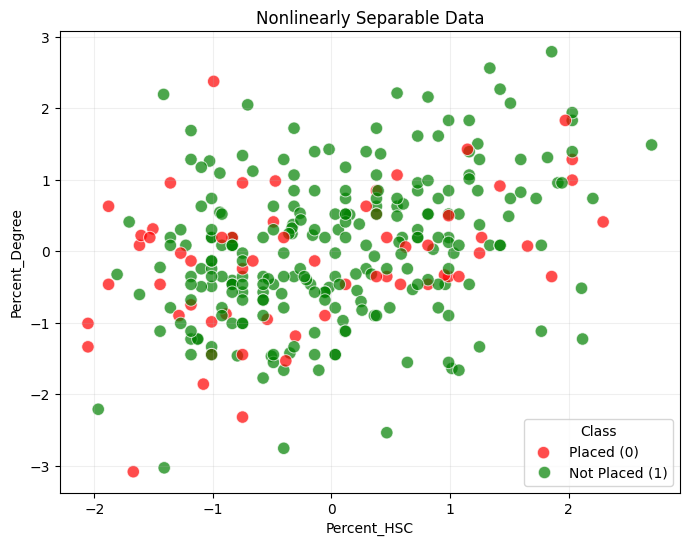

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
X1 = X_numerical_full.iloc[:,2]
X2 = X_numerical_full.iloc[:,3]

plt.figure(figsize = (8, 6))
sns.scatterplot(x = X1, y = X2, hue = y, palette={0: 'green', 1: 'red'}, alpha = 0.7, edgecolor = 'w', s = 80)

plt.title("Nonlinearly Separable Data", pad = 5)
plt.xlabel("Percent_HSC"), plt.ylabel("Percent_Degree")
plt.legend(title = 'Class', labels=['Placed (0)', 'Not Placed (1)'])
plt.grid(alpha = 0.2)
plt.show()

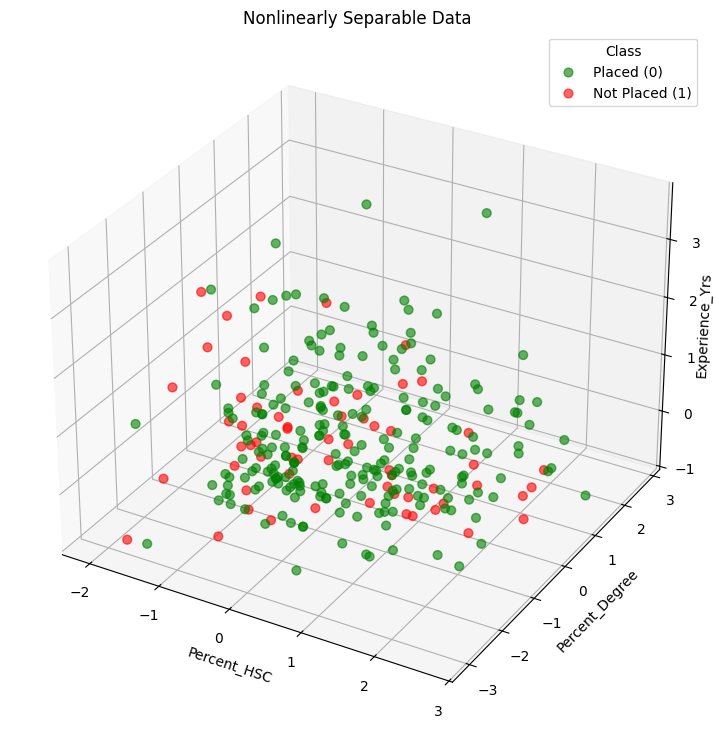

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X1 = X_numerical_full.iloc[:,2]
X2 = X_numerical_full.iloc[:,3]
X3 = X_numerical_full.iloc[:,4]

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X1[y == 0], X2[y == 0], X3[y == 0], c = 'green', label = 'Placed (0)', alpha = 0.6, s = 40)
ax.scatter(X1[y == 1], X2[y == 1], X3[y == 1], c = 'red', label = 'Not Placed (1)', alpha = 0.6, s = 40)
ax.set_title("Nonlinearly Separable Data")
ax.set_xlabel("Percent_HSC")
ax.set_ylabel("Percent_Degree")
ax.set_zlabel("Experience_Yrs", labelpad = -4)
ax.legend(title = 'Class')
plt.tight_layout(pad=3)
plt.show()

# 1- Quadratic Discriminant Analysis

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_full.columns
vif_data["VIF"] = [variance_inflation_factor(X_full.values, i) for i in range(X_full.shape[1])]
print(vif_data.sort_values(by="VIF", ascending=False))

                                   Feature       VIF
7   Specialization_MBA_Marketing & Finance  8.543492
17                Course_Degree_Management  7.167435
14                  Course_Degree_Commerce  6.649763
10                     Stream_HSC_Commerce  5.702891
8        Specialization_MBA_Marketing & HR  5.135527
0                                   Gender  3.355432
11                          Board_SSC_CBSE  3.210647
5                           Board_HSC_CBSE  2.748486
12                          Board_SSC_ICSE  2.114427
15     Course_Degree_Computer Applications  2.033095
2                              Percent_HSC  1.762001
16               Course_Degree_Engineering  1.716999
6                            Board_HSC_ISC  1.716664
13                      Course_Degree_Arts  1.713414
1                              Percent_SSC  1.697926
9                          Stream_HSC_Arts  1.691675
3                           Percent_Degree  1.476640
18                    Course_Degree_Others  1.

In [ ]:
params = {
    'priors': [
        [0.60, 0.40], [0.80, 0.20], [0.65, 0.35], [0.90, 0.10], [0.55, 0.45], [0.75, 0.25],
        [0.30, 0.70], [0.85, 0.15], [0.95, 0.05], [0.35, 0.65], [0.45, 0.55], [0.20, 0.80],
        [0.10, 0.90], [0.05, 0.95], [0.98, 0.02], [0.92, 0.08], [0.88, 0.12], [0.78, 0.22],
        [0.68, 0.32], [0.58, 0.42], [0.48, 0.52], [0.82, 0.18], [0.72, 0.28], [0.62, 0.38], None],
    'reg_param': [
        0.0001, 0.0005, 0.001, 0.002, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.075, 0.2]
}


qda_model = QuadraticDiscriminantAnalysis()

In [ ]:
np.random.seed(2025)
qda_grid = GridSearchCV(qda_model, param_grid = params, cv = split, n_jobs = -1, scoring = 'f1_macro')
qda_grid.fit(X_temp, y_temp)
print('Best Parameters:', qda_grid.best_params_)

In [ ]:
np.random.seed(2025)
qda_model = QuadraticDiscriminantAnalysis(priors = [0.6, 0.4], reg_param = 0.2)
qda_model.fit(X_temp, y_temp)
y_qda_pred = qda_model.predict(X_test)

print(classification_report(y_test, y_qda_pred, zero_division = 1))

In [ ]:
np.random.seed(2025)
qda_model.fit(X_full, y)
y_qda = qda_model.predict(X_full_test)

In [ ]:
from google.colab import files

pred_qda = pd.DataFrame({'ID': range(1, 92), 'Placement': y_qda})

with open('QDA_Optimized_Cov.csv', 'w') as file:
    pred_qda.to_csv(file, index = False, header = True)

files.download('QDA_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2- Guassian Naive Bayes - Not Good

In [ ]:
params = {
    "var_smoothing": np.logspace(-10, -5, 20)
}

gnb_model = GaussianNB()

In [ ]:
np.random.seed(2025)
gnb_grid = GridSearchCV(gnb_model, param_grid = params, cv = split_num, n_jobs = -1, scoring = 'f1_macro')
gnb_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', gnb_grid.best_params_)

In [ ]:
np.random.seed(2025)
gnb_model = GaussianNB(var_smoothing = 1e-10)
gnb_model.fit(X_temp_num, y_temp_num)
y_gnb_pred = gnb_model.predict(X_test_num)

print(classification_report(y_test, y_gnb_pred, zero_division = 1))

In [ ]:
np.random.seed(2025)
gnb_model.fit(X_numerical, y)
y_gnb = gnb_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_gnb = pd.DataFrame({'ID': range(1, 92), 'Placement': y_gnb})

with open('GNB_Full_Cov.csv', 'w') as file:
    pred_gnb.to_csv(file, index = False, header = True)

files.download('GNB_Full_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3- Random Forest

In [ ]:
params = {
    "n_estimators": Integer(50, 500),
    "max_depth": Integer(3, 50),
    "min_samples_split": Integer(2, 20),
    "min_samples_leaf": Integer(1, 20),
    "max_features": Real(0.1, 1.0, prior = "uniform"),
    "bootstrap": [True, False]
}

rf_model = RandomForestClassifier(random_state = 2025, n_jobs = -1)

In [ ]:
np.random.seed(2025)
rf_grid = BayesSearchCV(rf_model, search_spaces = params, cv = split,  n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
rf_grid.fit(X_temp, y_temp)
print('Best Parameters:', rf_grid.best_params_)

In [ ]:
np.random.seed(2025)
rf_model = RandomForestClassifier(bootstrap = False, max_depth = 50, max_features = 0.9617024082222135, min_samples_leaf = 9, min_samples_split = 19, n_estimators = 410, random_state = 2025)
rf_model.fit(X_temp, y_temp)
y_rf_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_rf_pred, zero_division = 1))

In [ ]:
np.random.seed(2025)
rf_model.fit(X_full, y)
y_rf = rf_model.predict(X_full_test)

In [ ]:
from google.colab import files

pred_rf = pd.DataFrame({'ID': range(1, 92), 'Placement': y_rf})

with open('RF_Optimized_Cov.csv', 'w') as file:
    pred_rf.to_csv(file, index = False, header = True)

files.download('RF_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4- XGBoost - Optimized

In [ ]:
params = {
    "n_estimators": Integer(50, 500),
    "eta": Real(0.01, 0.6, prior = "log-uniform"),
    "gamma": Real(0, 10, prior = "uniform"),
    "max_depth": Integer(3, 12),
    "min_child_weight": Integer(1, 10),
    "subsample": Real(0.5, 1.0, prior = "uniform"),
    "colsample_bytree": Real(0.5, 1.0, prior = "uniform"),
    "colsample_bylevel": Real(0.5, 1.0, prior = "uniform"),
    "colsample_bynode": Real(0.5, 1.0, prior = "uniform"),
    "reg_lambda": Real(1e-3, 10, prior = "log-uniform"),
    "alpha": Real(1e-3, 10, prior = "log-uniform"),
    "scale_pos_weight": Real(1, 10, prior = "uniform"),
    "max_delta_step": Integer(0, 10),
    "booster": Categorical(["gbtree", "gblinear", "dart"]),
    "grow_policy": Categorical(["depthwise", "lossguide"]),
}

xgb_model = XGBClassifier(random_state = 2025, n_jobs = -1)

In [ ]:
np.random.seed(2025)
xgb_grid = BayesSearchCV(xgb_model, search_spaces = params, cv = split_num,  n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
xgb_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', xgb_grid.best_params_)

In [ ]:
np.random.seed(2025)

xgb_model = XGBClassifier(
    alpha = 0.06391827237372939,
    booster = 'gbtree',
    colsample_bylevel = 0.7267205762746404,
    colsample_bynode = 0.5,
    colsample_bytree = 0.7551547480106018,
    eta = 0.03785163981456838,
    gamma = 2.7349715637723726,
    grow_policy = 'lossguide',
    max_delta_step = 3,
    max_depth = 5,
    min_child_weight = 1,
    n_estimators = 217,
    reg_lambda = 0.7526357859247697,
    scale_pos_weight = 3.2996657908559284,
    subsample = 1.0,
    random_state = 2025
)

xgb_model.fit(X_temp_num, y_temp_num)
y_xgb_pred = xgb_model.predict(X_test_num)

print(classification_report(y_test, y_xgb_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        36
           1       0.62      0.89      0.73         9

    accuracy                           0.87        45
   macro avg       0.79      0.88      0.82        45
weighted avg       0.90      0.87      0.87        45



In [ ]:
np.random.seed(2025)
xgb_model.fit(X_numerical, y)
y_xgb = xgb_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_xgb = pd.DataFrame({'ID': range(1, 92), 'Placement': y_xgb})

with open('XGB_Optimized_Cov.csv', 'w') as file:
    pred_xgb.to_csv(file, index = False, header = True)

files.download('XGB_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4- XGBoost - Grid Search

In [ ]:
params = {
    "n_estimators": [50, 100, 200, 300],
    "eta": [0.54, 0.55, 0.56, 0.57],
    "gamma": [0.57, 0.58, 0.59, 0.60],
    "max_depth": [3, 5, 7],
    "scale_pos_weight": [1, 3, 5]
}

xgb_model = XGBClassifier(random_state = 2025)

In [ ]:
np.random.seed(2025)
xgb_grid = GridSearchCV(xgb_model, param_grid = params, cv = split_num, n_jobs = -1, scoring = 'f1_macro')
xgb_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', xgb_grid.best_params_)

In [ ]:
np.random.seed(2025)
xgb_model = XGBClassifier(n_estimators = 50, eta = 0.54, gamma = 0.57, max_depth = 3, scale_pos_weight = 3, booster = 'gbtree', random_state = 2025)
xgb_model.fit(X_temp_num, y_temp_num)
y_xgb_pred = xgb_model.predict(X_test_num)

print(classification_report(y_test, y_xgb_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.95      0.99      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
np.random.seed(2025)
xgb_model.fit(X_numerical, y)
y_xgb = xgb_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_xgb = pd.DataFrame({'ID': range(1, 92), 'Placement': y_xgb})

with open('XGB_Full_Cov.csv', 'w') as file:
    pred_xgb.to_csv(file, index = False, header = True)

files.download('XGB_Full_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5- Categorical Naive Bayes

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_ordinal = encoder.fit_transform(X_categorical)
X_ordinal_test = encoder.fit_transform(X_categorical_test)

In [ ]:
X_train_ord, X_temp_ord, y_train_ord, y_temp_ord = train_test_split(X_ordinal, y, test_size = 0.3, random_state = 2025, stratify = y)
X_val_ord, X_test_ord, y_val_ord, y_test_ord = train_test_split(X_temp_ord, y_temp_ord, test_size = 0.5, random_state = 2025, stratify = y_temp_ord)

In [ ]:
np.random.seed(2025)
train_ind_ord, val_ind_ord = train_test_split(np.arange(X_temp_ord.shape[0]), test_size = 0.3, random_state = 2025, stratify = y_temp_ord)
split_ord = PredefinedHoldoutSplit(valid_indices = val_ind_ord)

In [ ]:
params = {
    'alpha': [1.0, 15.0, 20.0],
    'class_prior': [None, [0.8, 0.2], [0.7, 0.3]]
}

cnb_model = CategoricalNB()

In [ ]:
np.random.seed(2025)
cnb_grid = GridSearchCV(cnb_model, param_grid = params, cv = split_ord, n_jobs = -1, scoring = 'f1_macro')
cnb_grid.fit(X_temp_ord, y_temp_ord)
print('Best Parameters:', cnb_grid.best_params_)

In [ ]:
np.random.seed(2025)
cnb_model = CategoricalNB(alpha = 15, class_prior = None, fit_prior = False)
cnb_model.fit(X_temp_ord, y_temp_ord)
y_cnb_pred = cnb_model.predict(X_test_ord)

print(classification_report(y_test, y_cnb_pred, zero_division = 1))

In [ ]:
np.random.seed(2025)
cnb_model.fit(X_ordinal, y)
y_cnb = cnb_model.predict(X_ordinal_test)

In [ ]:
from google.colab import files

pred_cnb = pd.DataFrame({'ID': range(1, 92), 'Placement': y_cnb})

with open('CNB_Full_Cov.csv', 'w') as file:
    pred_cnb.to_csv(file, index = False, header = True)

files.download('CNB_Full_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6- CATBoost

In [ ]:
params = {
    'learning_rate': Real(0.01, 0.3, prior = 'log-uniform'),
    'depth': Integer(3, 10),
    'l2_leaf_reg': Real(0.001, 10, prior = 'log-uniform'),
    'scale_pos_weight': Real(0.5, 10.0, prior = 'uniform')
}

cat_features = ["Board_SSC", "Board_HSC", "Stream_HSC", "Course_Degree", "Specialization_MBA"]
cat_model = CatBoostClassifier(verbose = 0, cat_features = cat_features, random_seed = 2025)

In [ ]:
X_temp_new = pd.concat([X_temp_num.iloc[:, :4],X_temp_cag.iloc[:, 1:]], axis = 1)

np.random.seed(2025)
cat_grid = BayesSearchCV(cat_model, params, n_iter = 50, cv = 5, n_jobs = -1, scoring = 'f1_macro')
cat_grid.fit(X_temp_new, y_temp)
print('Best Parameters:', cat_grid.best_params_)

In [ ]:
X_temp_new = pd.concat([X_temp.iloc[:, :4],X_temp_cag.iloc[:, 1:]], axis = 1)
X_test_new = pd.concat([X_test_num.iloc[:, :4],X_test_cag.iloc[:, 1:]], axis = 1)

np.random.seed(2025)
cat_model = CatBoostClassifier(depth = 6, l2_leaf_reg = 7, learning_rate = 0.032877387162780214, scale_pos_weight = 3.46209647406391, verbose = 0, cat_features = cat_features, random_seed = 2025)
cat_model.fit(X_temp_new, y_temp)
y_cat_pred = cat_model.predict(X_test_new)

print(classification_report(y_test, y_cat_pred, zero_division = 1))

In [ ]:
X_Temp_new = pd.concat([X_full.iloc[:, :4],X_categorical.iloc[:, 1:]], axis = 1)
X_Test_new = pd.concat([X_full_test.iloc[:, :4],X_categorical_test.iloc[:, 1:]], axis = 1)

np.random.seed(2025)
cat_model.fit(X_Temp_new, y)
y_cat = cat_model.predict(X_Test_new)

In [ ]:
from google.colab import files

pred_cat = pd.DataFrame({'ID': range(1, 92), 'Placement': y_cat})

with open('CAT_Full_Cov.csv', 'w') as file:
    pred_cat.to_csv(file, index = False, header = True)

files.download('CAT_Full_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7 - KNN

In [ ]:
params = {
    'n_neighbors': Integer(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': Integer(1, 5),
    'leaf_size': Integer(10, 50)
}


knn_model = KNeighborsClassifier(n_jobs = -1)

In [ ]:
np.random.seed(2025)
knn_grid = BayesSearchCV(knn_model, search_spaces = params, cv = split_num,  n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
knn_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', knn_grid.best_params_)

In [ ]:
np.random.seed(2025)

knn_model = KNeighborsClassifier(leaf_size = 47, metric = "euclidean", n_neighbors = 3, p = 5, weights = "uniform", n_jobs = -1)
knn_model.fit(X_temp, y_temp)
y_knn_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_knn_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.50      0.22      0.31         9

    accuracy                           0.80        45
   macro avg       0.66      0.58      0.60        45
weighted avg       0.76      0.80      0.77        45



In [ ]:
np.random.seed(2025)
knn_model.fit(X_full, y)
y_knn = knn_model.predict(X_full_test)

In [ ]:
from google.colab import files

pred_knn = pd.DataFrame({'ID': range(1, 92), 'Placement': y_knn})

with open('KNN_Optimized_Cov.csv', 'w') as file:
    pred_knn.to_csv(file, index = False, header = True)

files.download('KNN_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7 - KNN - SMOTE

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek = TomekLinks(sampling_strategy = 'majority')),
                               KNeighborsClassifier(leaf_size = 47, metric = "euclidean", n_neighbors = 3, p = 5, weights = "uniform", n_jobs = -1))

In [ ]:
SMOTETomek_knn = SMOTETomek_pipeline
SMOTETomek_knn.fit(X_temp, y_temp)
y_pred_SMOTETomek_knn = SMOTETomek_knn.predict(X_test)
print(classification_report(y_test, y_pred_SMOTETomek_knn, zero_division = 1))

In [ ]:
np.random.seed(2025)
SMOTETomek_knn.fit(X_full, y)
y_SMOTETomek_knn = SMOTETomek_knn.predict(X_full_test)

In [ ]:
from google.colab import files

pred_SMOTETomek_knn = pd.DataFrame({'ID': range(1, 92), 'Placement': y_SMOTETomek_knn})

with open('SMOTETomek_KNN_Optimized_Cov.csv', 'w') as file:
    pred_SMOTETomek_knn.to_csv(file, index = False, header = True)

files.download('SMOTETomek_KNN_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8- SVC - Optimized

In [ ]:
params = {
    'C': Real(1e-2, 1e+3, prior = 'log-uniform'),
    'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
    'gamma': Real(1e-3, 1, prior = 'log-uniform'),
    'degree': Integer(3, 5),
    'shrinking': Categorical([True, False]),
}

svc_model = SVC(random_state = 2025)

In [ ]:
np.random.seed(2025)
svc_grid = BayesSearchCV(svc_model, search_spaces = params, cv = split_num, n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
svc_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', svc_grid.best_params_)

In [ ]:
np.random.seed(2025)
svc_model = SVC(C = 545.8658477670018, degree = 5, gamma = 1, kernel = "rbf", shrinking = True, random_state = 2025)
svc_model.fit(X_temp_num, y_temp_num)
y_svc_pred = svc_model.predict(X_test_num)

print(classification_report(y_test, y_svc_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         9

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
np.random.seed(2025)
svc_model.fit(X_numerical, y)
y_svc = svc_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_svc = pd.DataFrame({'ID': range(1, 92), 'Placement': y_svc})

with open('SVC_Optimized_Cov.csv', 'w') as file:
    pred_svc.to_csv(file, index = False, header = True)

files.download('SVC_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 9- MLP - Optimized

In [ ]:
params = {
    'activation': Categorical(['relu', 'tanh', 'logistic']),
    'solver': Categorical(['adam', 'lbfgs']),
    'alpha': Real(1e-4, 1e-2, prior = 'log-uniform'),
    'learning_rate': Categorical(['constant', 'adaptive']),
    'learning_rate_init': Real(1e-4, 1e-2, prior = 'log-uniform'),
    'max_iter': Integer(100, 1000),
    'batch_size': Integer(8, 32),
    'early_stopping': Categorical([True, False]),
}

mlp_model = MLPClassifier(random_state = 2025)

In [ ]:
np.random.seed(2025)
mlp_grid = BayesSearchCV(mlp_model, search_spaces = params, cv = split_num, n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
mlp_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', mlp_grid.best_params_)

In [ ]:
np.random.seed(2025)
mlp_model = MLPClassifier(activation = 'tanh', alpha = 0.00725888843762956, learning_rate = 'adaptive', learning_rate_init = 0.01, max_iter = 1000, batch_size = 15, early_stopping = True, solver = 'lbfgs', random_state = 2025)
mlp_model.fit(X_temp_num, y_temp_num)
y_mlp_pred = mlp_model.predict(X_test_num)

print(classification_report(y_test, y_mlp_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         9

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
np.random.seed(2025)
mlp_model.fit(X_numerical, y)
y_mlp = mlp_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_mlp = pd.DataFrame({'ID': range(1, 92), 'Placement': y_mlp})

with open('MLP_Optimized_Cov.csv', 'w') as file:
    pred_mlp.to_csv(file, index = False, header = True)

files.download('MLP_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 10 - Ensemble 1

In [ ]:
y_rf_fit = rf_model.predict(X_full)
y_xgb_fit = xgb_model.predict(X_numerical)
y_cat_fit = cat_model.predict(X_Temp_new)
y_knn_fit = knn_model.predict(X_full)
y_svc_fit = svc_model.predict(X_numerical)
X_numerical_new = np.column_stack((X_numerical, y_rf_fit, y_xgb_fit, y_cat_fit, y_knn_fit, y_svc_fit))

y_rf_pred = rf_model.predict(X_full_test)
y_xgb_pred = xgb_model.predict(X_numerical_test)
y_cat_pred = cat_model.predict(X_Test_new)
y_knn_pred = knn_model.predict(X_full_test)
y_svc_pred = svc_model.predict(X_numerical_test)
X_numerical_test_new = np.column_stack((X_numerical_test, y_rf_pred, y_xgb_pred, y_cat_pred, y_knn_pred, y_svc_pred))

In [ ]:
np.random.seed(2025)
ensm_model_1 = MLPClassifier(activation = 'logistic', alpha = 0.0001, batch_size = 32, early_stopping = False, learning_rate = 'adaptive', learning_rate_init = 0.01, max_iter = 1000, solver = 'lbfgs', random_state = 2025)
ensm_model_1.fit(X_numerical_new, y)
y_ensm_pred_1 = ensm_model_1.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_1 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_1})

with open('ENSM_Optimized_Cov_1.csv', 'w') as file:
    pred_ensm_1.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 11 - Ensemble 2

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_cat_fit = cat_model.predict(X_Temp_new)
y_knn_fit = knn_model.predict(X_full)
y_svc_fit = svc_model.predict(X_numerical)
X_numerical_new = np.column_stack((X_numerical, y_xgb_fit, y_cat_fit, y_knn_fit, y_svc_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_cat_pred = cat_model.predict(X_Test_new)
y_knn_pred = knn_model.predict(X_full_test)
y_svc_pred = svc_model.predict(X_numerical_test)
X_numerical_test_new = np.column_stack((X_numerical_test, y_xgb_pred, y_cat_pred, y_knn_pred, y_svc_pred))

In [ ]:
np.random.seed(2025)
ensm_model_2 = MLPClassifier(activation = 'tanh', alpha = 0.0018203340067206705, batch_size = 23, early_stopping = True, learning_rate = 'adaptive', learning_rate_init = 0.0034626836021445246, max_iter = 903, solver = 'lbfgs', random_state = 2025)
ensm_model_2.fit(X_numerical_new, y)
y_ensm_pred_2 = ensm_model_2.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_2 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_2})

with open('ENSM_Optimized_Cov_2.csv', 'w') as file:
    pred_ensm_2.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 12 - Ensemble 3

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_knn_fit = knn_model.predict(X_full)
y_svc_fit = svc_model.predict(X_numerical)
X_numerical_new = np.column_stack((X_numerical, y_xgb_fit, y_knn_fit, y_svc_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_knn_pred = knn_model.predict(X_full_test)
y_svc_pred = svc_model.predict(X_numerical_test)
X_numerical_test_new = np.column_stack((X_numerical_test, y_xgb_pred, y_knn_pred, y_svc_pred))

In [ ]:
np.random.seed(2025)
ensm_model_3 = MLPClassifier(activation = 'tanh', alpha = 0.0018108131782875515, batch_size = 17, early_stopping = True, learning_rate = 'adaptive', learning_rate_init = 0.0005502670909651138, max_iter = 100, solver = 'lbfgs', random_state = 2025)
ensm_model_3.fit(X_numerical_new, y)
y_ensm_pred_3 = ensm_model_3.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_3 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_3})

with open('ENSM_Optimized_Cov_3.csv', 'w') as file:
    pred_ensm_3.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 13 - Ensemble 4

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_knn_fit = knn_model.predict(X_full)
y_svc_fit = svc_model.predict(X_numerical)
X_full_new = np.column_stack((X_full, y_xgb_fit, y_knn_fit, y_svc_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_knn_pred = knn_model.predict(X_full_test)
y_svc_pred = svc_model.predict(X_numerical_test)
X_full_test_new = np.column_stack((X_full_test, y_xgb_pred, y_knn_pred, y_svc_pred))

In [ ]:
np.random.seed(2025)
ensm_model_4 = MLPClassifier(activation = 'logistic', alpha = 0.006466342067384797, batch_size = 16, early_stopping = True, learning_rate = 'constant', learning_rate_init = 0.0016700453073675982, max_iter = 235, solver = 'adam', random_state = 2025)
ensm_model_4.fit(X_full_new, y)
y_ensm_pred_4 = ensm_model_4.predict(X_full_test_new)

In [ ]:
from google.colab import files

pred_ensm_4 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_4})

with open('ENSM_Optimized_Cov_4.csv', 'w') as file:
    pred_ensm_4.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 14 - Ensemble 5

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
X_numerical_new = np.column_stack((X_numerical, y_xgb_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
X_numerical_test_new = np.column_stack((X_numerical_test, y_xgb_pred))

In [ ]:
np.random.seed(2025)
ensm_model_5 = MLPClassifier(activation = 'tanh', alpha = 0.0027962083893340725, batch_size = 20, early_stopping = True, learning_rate = 'adaptive', learning_rate_init = 0.0005164853374694837, max_iter = 438, solver = 'lbfgs', random_state = 2025)
ensm_model_5.fit(X_numerical_new, y)
y_ensm_pred_5 = ensm_model_5.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_5 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_5})

with open('ENSM_Optimized_Cov_5.csv', 'w') as file:
    pred_ensm_5.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 15 - Ensemble 6

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_svc_fit = svc_model.predict(X_numerical)
X_numerical_new = np.column_stack((X_numerical, y_xgb_fit, y_svc_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_svc_pred = svc_model.predict(X_numerical_test)
X_numerical_test_new = np.column_stack((X_numerical_test, y_xgb_pred, y_svc_pred))

In [ ]:
np.random.seed(2025)
ensm_model_6 = MLPClassifier(activation = 'tanh', alpha = 0.0018203340067206705, batch_size = 23, early_stopping = True, learning_rate = 'adaptive', learning_rate_init = 0.0034626836021445246, max_iter = 1349, solver = 'lbfgs', random_state = 2025)
ensm_model_6.fit(X_numerical_new, y)
y_ensm_pred_6 = ensm_model_6.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_6 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_6})

with open('ENSM_Optimized_Cov_6.csv', 'w') as file:
    pred_ensm_6.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 16 - Ensemble 7

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_knn_fit = knn_model.predict(X_full)
X_numerical_new = np.column_stack((X_numerical, y_xgb_fit, y_knn_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_knn_pred = knn_model.predict(X_full_test)
X_numerical_test_new = np.column_stack((X_numerical_test, y_xgb_pred, y_knn_pred))

In [ ]:
np.random.seed(2025)
ensm_model_7 = MLPClassifier(activation = 'tanh', alpha = 0.0007108233855892977, batch_size = 8, early_stopping = False, learning_rate = 'adaptive', learning_rate_init = 0.0001, max_iter = 1500, solver = 'lbfgs', random_state = 2025)
ensm_model_7.fit(X_numerical_new, y)
y_ensm_pred_7 = ensm_model_7.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_7 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_7})

with open('ENSM_Optimized_Cov_7.csv', 'w') as file:
    pred_ensm_7.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 16 - Ensemble 7 SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2025)

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_knn_fit = knn_model.predict(X_full)
X_numerical_new = np.column_stack((X_numerical, y_xgb_fit, y_knn_fit))
X_numerical_new_new, y_new = smote.fit_resample(X_numerical_new, y)

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_knn_pred = knn_model.predict(X_full_test)

In [ ]:
np.random.seed(2025)
ensm_model_7 = MLPClassifier(activation = 'tanh', alpha = 0.0002, batch_size = 8, early_stopping = True, learning_rate = 'constant', learning_rate_init = 0.01, max_iter = 1500, solver = 'lbfgs', random_state = 2025)
ensm_model_7.fit(X_numerical_new_new, y_new)
y_ensm_pred_7 = ensm_model_7.predict(X_numerical_test_new)

In [ ]:
from google.colab import files

pred_ensm_7 = pd.DataFrame({'ID': range(1, 92), 'Placement': y_ensm_pred_7})

with open('ENSM_Optimized_Cov_7_SMOTE.csv', 'w') as file:
    pred_ensm_7.to_csv(file, index = False, header = True)

files.download('ENSM_Optimized_Cov_7_SMOTE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 17 - DT

In [ ]:
y_mlp_fit = ensm_model_7.predict(X_numerical_new)
y_svc_fit = svc_model.predict(X_numerical)

y_mlp_pred = ensm_model_7.predict(X_numerical_test_new)
y_svc_pred = svc_model.predict(X_numerical_test)

X_full_dt = np.column_stack((X_numerical, y_mlp_fit, y_svc_fit))
X_full_test_dt = np.column_stack((X_numerical_test, y_mlp_pred, y_svc_pred))

In [ ]:
np.random.seed(2025)
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 18, min_samples_leaf = 47, min_samples_split = 22, splitter = 'random', random_state = 2025)
dt_model.fit(X_full_dt, y)
y_dt_ensm_pred = dt_model.predict(X_full_test_dt)

In [ ]:
from google.colab import files

pred_dt_ensm = pd.DataFrame({'ID': range(1, 92), 'Placement': y_dt_ensm_pred})

with open('DT_ENSM_Cov.csv', 'w') as file:
    pred_dt_ensm.to_csv(file, index = False, header = True)

files.download('DT_ENSM_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 18- Skew PNN

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

class SkewPNN(BaseEstimator, ClassifierMixin):
    def __init__(self, sigma=1.0, alpha=0.0):
        self.sigma = sigma
        self.alpha = alpha

    def _skew_normal_kernel(self, x, xi):
        d = np.linalg.norm(x - xi)
        gaussian_part = np.exp(-(d**2) / (2 * self.sigma**2))
        skew_part = norm.cdf(self.alpha * (d / self.sigma))
        return 2 * gaussian_part * skew_part

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.X_ = X
        self.y_ = y
        self.label_encoder_ = LabelEncoder()
        self.y_encoded_ = self.label_encoder_.fit_transform(y)
        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)

        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        probabilities = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            class_sums = np.zeros(n_classes)

            for j in range(len(self.X_)):
                kernel_val = self._skew_normal_kernel(X[i], self.X_[j])
                class_idx = self.y_encoded_[j]
                class_sums[class_idx] += kernel_val

            class_counts = np.bincount(self.y_encoded_, minlength=n_classes)
            class_probs = class_sums / (class_counts + 1e-10)

            class_probs = class_probs / (class_probs.sum() + 1e-10)
            probabilities[i] = class_probs

        return probabilities

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

In [ ]:
params = {
    'sigma': Real(1e-2, 10.0, prior = 'log-uniform'),
    'alpha': Real(-10.0, 10.0, prior = 'uniform'),
}

np.random.seed(2025)
pnn_model = SkewPNN()

In [ ]:
np.random.seed(2025)
pnn_grid = BayesSearchCV(pnn_model, search_spaces = params, cv = split_num, n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
np.random.seed(2025)
pnn_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', pnn_grid.best_params_)

In [ ]:
np.random.seed(2025)
pnn_model = SkewPNN(alpha = -10.0, sigma = 2.0660987593776685)
np.random.seed(2025)
pnn_model.fit(X_temp_num, y_temp_num)
y_pnn_pred = pnn_model.predict(X_test_num)

print(classification_report(y_test, y_pnn_pred, zero_division = 1))

In [ ]:
np.random.seed(2025)
pnn_model.fit(X_numerical, y)
y_pnn = pnn_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_pnn = pd.DataFrame({'ID': range(1, 92), 'Placement': y_pnn})

with open('PNN_Optimized_Cov.csv', 'w') as file:
    pred_pnn.to_csv(file, index = False, header = True)

files.download('PNN_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 19- Skew PNN - RBF, Sigmoid, Guassian

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import numpy as np

class SkewPNN(BaseEstimator, ClassifierMixin):
    def __init__(self, sigma=1.0, alpha=0.0, kernel='skew'):
        self.sigma = sigma
        self.alpha = alpha
        self.kernel = kernel

    def _kernel_func(self, x, xi):
        d = np.linalg.norm(x - xi)

        if self.kernel == 'skew':
            gaussian = np.exp(-(d**2) / (2 * self.sigma**2))
            skew = norm.cdf(self.alpha * (d / self.sigma))
            return 2 * gaussian * skew

        elif self.kernel == 'gaussian' or self.kernel == 'rbf':
            return np.exp(-(d**2) / (2 * self.sigma**2))

        elif self.kernel == 'sigmoid':
            gamma = 1.0 / (2 * self.sigma**2)
            coef0 = 0
            return np.tanh(gamma * np.dot(x, xi) + coef0)

        else:
            raise ValueError(f"Unsupported kernel type: {self.kernel}")

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.X_ = X
        self.y_ = y
        self.label_encoder_ = LabelEncoder()
        self.y_encoded_ = self.label_encoder_.fit_transform(y)
        return self

    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        n_samples, n_classes = X.shape[0], len(self.classes_)
        probabilities = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            class_sums = np.zeros(n_classes)
            for j in range(len(self.X_)):
                k_val = self._kernel_func(X[i], self.X_[j])
                class_idx = self.y_encoded_[j]
                class_sums[class_idx] += k_val

            class_counts = np.bincount(self.y_encoded_, minlength=n_classes)
            class_probs = class_sums / (class_counts + 1e-10)
            class_probs /= (class_probs.sum() + 1e-10)
            probabilities[i] = class_probs

        return probabilities

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

In [ ]:
params = {
    'sigma': Real(1e-2, 10.0, prior = 'log-uniform'),
    'alpha': Real(-10.0, 10.0, prior = 'uniform'),
    'kernel': Categorical(['gaussian', 'skew', 'rbf', 'sigmoid'])

}

np.random.seed(2025)
pnn_model = SkewPNN()

In [ ]:
np.random.seed(2025)
pnn_grid = BayesSearchCV(pnn_model, search_spaces = params, cv = split_num, n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
np.random.seed(2025)
pnn_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', pnn_grid.best_params_)

In [ ]:
np.random.seed(2025)
pnn_model = SkewPNN(alpha = 6.441581136969965, sigma = 0.13031791379887442, kernel = 'skew')
np.random.seed(2025)
pnn_model.fit(X_temp_num, y_temp_num)
y_pnn_pred = pnn_model.predict(X_test_num)

print(classification_report(y_test, y_pnn_pred, zero_division = 1))

In [ ]:
np.random.seed(2025)
pnn_model.fit(X_numerical, y)
y_pnn = pnn_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_pnn = pd.DataFrame({'ID': range(1, 92), 'Placement': y_pnn})

with open('Skew_PNN_Optimized_Cov.csv', 'w') as file:
    pred_pnn.to_csv(file, index = False, header = True)

files.download('Skew_PNN_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Skew SVM

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.svm import SVC
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.preprocessing import LabelEncoder

In [ ]:
class SkewNormalKernel:
    def __init__(self, sigma = 1.0, alpha = 0.0):
        self.sigma = sigma
        self.alpha = alpha

    def __call__(self, X, Y=None):
        if Y is None:
            Y = X

        X_sq = np.sum(X**2, axis=1)[:, np.newaxis]
        Y_sq = np.sum(Y**2, axis=1)[np.newaxis, :]
        distances_sq = X_sq + Y_sq - 2 * np.dot(X, Y.T)
        distances = np.sqrt(np.maximum(distances_sq, 0))

        gaussian_part = np.exp(-distances_sq / (2 * self.sigma**2))
        skew_part = norm.cdf(self.alpha * distances / self.sigma)
        return 2 * gaussian_part * skew_part

class SkewSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C = 1.0, sigma = 1.0, alpha = 0.0, kernel = 'skew_normal', max_iter = -1, random_state = None):

        self.C = C
        self.sigma = sigma
        self.alpha = alpha
        self.kernel = kernel
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.X_ = X
        self.y_ = y

        self.label_encoder_ = LabelEncoder()
        y_encoded = self.label_encoder_.fit_transform(y)

        if self.kernel == 'skew_normal':
            kernel_func = SkewNormalKernel(sigma = self.sigma, alpha = self.alpha)
            K = kernel_func(X)
        else:
            raise ValueError("Only 'skew_normal' kernel is currently supported")

        self.svm_ = SVC(
            C = self.C,
            kernel = 'precomputed',
            max_iter = self.max_iter,
            random_state = self.random_state
        )
        self.svm_.fit(K, y_encoded)

        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)

        kernel_func = SkewNormalKernel(sigma=self.sigma, alpha=self.alpha)
        K_test = kernel_func(X, self.X_)

        y_pred_encoded = self.svm_.predict(K_test)
        return self.label_encoder_.inverse_transform(y_pred_encoded)

    def decision_function(self, X):
        check_is_fitted(self)
        X = check_array(X)

        kernel_func = SkewNormalKernel(sigma=self.sigma, alpha=self.alpha)
        K_test = kernel_func(X, self.X_)
        return self.svm_.decision_function(K_test)

In [ ]:
params = {
    'C': Real(1e-2, 1e+3, prior = 'log-uniform'),
    'sigma': Real(0.1, 5.0, prior = 'uniform'),
    'alpha': Real(0.1, 5.0, prior = 'uniform')
}

np.random.seed(2025)
svm_model = SkewSVM(random_state = 2025)

In [ ]:
np.random.seed(2025)
svm_grid = BayesSearchCV(svm_model, search_spaces = params, cv = split_num, n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
np.random.seed(2025)
svm_grid.fit(X_temp_num, y_temp_num)
print('Best Parameters:', svm_grid.best_params_)

In [ ]:
np.random.seed(2025)
svm_model = SkewSVM(C = 52.236208912456775, alpha = 1.0, sigma = 0.3592066419141987, random_state = 2025)
np.random.seed(2025)
svm_model.fit(X_temp_num, y_temp_num)
y_svm_pred = svm_model.predict(X_test_num)

print(classification_report(y_test, y_svm_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.95      0.99      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
np.random.seed(2025)
svm_model.fit(X_numerical, y)
y_svm = svm_model.predict(X_numerical_test)

In [ ]:
from google.colab import files

pred_svm = pd.DataFrame({'ID': range(1, 92), 'Placement': y_svm})

with open('Skew_SVM_Optimized_Cov.csv', 'w') as file:
    pred_svm.to_csv(file, index = False, header = True)

files.download('Skew_SVM_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 20- Balanced RF


In [ ]:
params = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 30),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'bootstrap': Categorical([True, False]),
    'replacement': Categorical([True, False]),
    'sampling_strategy': Categorical(['auto', 'all', 'majority', 'not minority', 'not majority']),
    'class_weight': Categorical([None, 'balanced', 'balanced_subsample']),
    'ccp_alpha': Real(0.0, 0.1),
}

rf_balanced_model = BalancedRandomForestClassifier(random_state = 2025)

y_knn = knn_model.predict(X_temp)
y_xgb = xgb_model.predict(X_temp_num)
X_temp_new = np.column_stack([X_temp, y_knn, y_xgb])

In [ ]:
np.random.seed(2025)
rf_balanced_grid = BayesSearchCV(rf_balanced_model, search_spaces = params, cv = split, n_iter = 50, n_jobs = -1, scoring = 'f1_macro')
rf_balanced_grid.fit(X_temp_new, y_temp)
print('Best Parameters:', rf_balanced_grid.best_params_)

In [ ]:
y_xgb_fit = xgb_model.predict(X_numerical)
y_knn_fit = knn_model.predict(X_full)
X_full_new = np.column_stack((X_full, y_xgb_fit, y_knn_fit))

y_xgb_pred = xgb_model.predict(X_numerical_test)
y_knn_pred = knn_model.predict(X_full_test)
X_full_test_new = np.column_stack((X_full_test, y_xgb_pred, y_knn_pred))

In [ ]:
np.random.seed(2025)
rf_balanced_model = BalancedRandomForestClassifier(bootstrap = False,
                                                   ccp_alpha = 0.0,
                                                   class_weight = 'balanced_subsample',
                                                   max_depth = 3,
                                                   max_features = None,
                                                   min_samples_leaf = 1,
                                                   min_samples_split = 2,
                                                   n_estimators = 300,
                                                   replacement = False,
                                                   sampling_strategy = 'all',
                                                   random_state = 2025)
rf_balanced_model.fit(X_full_new, y)
y_rf_balanced_pred = rf_balanced_model.predict(X_full_test_new)

In [ ]:
from google.colab import files

pred_rf_balanced = pd.DataFrame({'ID': range(1, 92), 'Placement': y_rf_balanced_pred})

with open('RF_ENSM_Optimized_Cov.csv', 'w') as file:
    pred_rf_balanced.to_csv(file, index = False, header = True)

files.download('RF_ENSM_Optimized_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 20- Balanced RF - GHOST

In [ ]:
!pip install ghostml

In [ ]:
import ghostml
from sklearn import metrics

def calc_metrics(labels_test, test_probs, threshold = 0.5):
  scores = [1 if x>=threshold else 0 for x in test_probs]
  auc = metrics.roc_auc_score(labels_test, test_probs)
  kappa = metrics.cohen_kappa_score(labels_test, scores)
  confusion = metrics.confusion_matrix(labels_test, scores, labels = list(set(labels_test)))

  print('Threshold: %.2f, kappa: %.3f, AUC test set: %.3f'%(threshold, kappa, auc))
  print(confusion)
  print(metrics.classification_report(labels_test, scores))

  return

thresholds = np.round(np.arange(0.01, 0.75,0.01),2)

In [ ]:
np.random.seed(2025)
X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size = 0.3, random_state = 2025, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 2025, stratify = y_temp)


rf_ghost = BalancedRandomForestClassifier(bootstrap = True,
                                          ccp_alpha = 0.0,
                                          class_weight = 'balanced_subsample',
                                          max_depth = 3,
                                          max_features = None,
                                          min_samples_leaf = 1,
                                          min_samples_split = 2,
                                          n_estimators = 300,
                                          replacement = False,
                                          sampling_strategy = 'all',
                                          oob_score = True,
                                          random_state = 2025)

rf_ghost.fit(X_temp, y_temp)
rf_test_probs = rf_ghost.predict_proba(X_test)[:,1]
calc_metrics(y_test, rf_test_probs, threshold = 0.5)

Threshold: 0.50, kappa: 0.476, AUC test set: 0.975
[[25 11]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.45      1.00      0.62         9

    accuracy                           0.76        45
   macro avg       0.72      0.85      0.72        45
weighted avg       0.89      0.76      0.78        45



In [ ]:
np.random.seed(2025)
rf_temp_probs = rf_ghost.predict_proba(X_temp)[:,1]
rf_threshold = ghostml.optimize_threshold_from_predictions(y_test,
                                                           rf_test_probs,
                                                           thresholds,
                                                           ThOpt_metrics = 'Kappa')

np.random.seed(2025)
calc_metrics(y_test, rf_test_probs, threshold = rf_threshold)
rf_GHOST_test = [1 if x >= rf_threshold else 0 for x in rf_test_probs]

Threshold: 0.59, kappa: 0.815, AUC test set: 0.975
[[33  3]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.75      1.00      0.86         9

    accuracy                           0.93        45
   macro avg       0.88      0.96      0.91        45
weighted avg       0.95      0.93      0.94        45



In [ ]:
np.random.seed(2025)
rf_ghost.fit(X_full, y)
rf_probs = rf_ghost.predict_proba(X_full_test)[:,1]
rf_pred_ghost = [1 if x >= rf_threshold else 0 for x in rf_probs]

In [ ]:
from google.colab import files

pred_rf = pd.DataFrame({'ID': range(1, 92), 'Placement': rf_pred_ghost})

with open('BRF_GHOST_Cov.csv', 'w') as file:
    pred_rf.to_csv(file, index = False, header = True)

files.download('BRF_GHOST_Cov.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>